<a href="https://colab.research.google.com/github/jonisabdulkarim/CE888/blob/main/Lab3/bank_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, balanced_accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

In [3]:
# import CSV with a semi-colon delimiter
link = "https://raw.githubusercontent.com/jonisabdulkarim/CE888/main/Lab3/bank-additional-full.csv?token=AM63NA5STTM3TLKO2CW3N4DADU4WM"
df = pd.read_csv(link, sep=';')

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [7]:
# get  number of examples
len(df)

41188

In [9]:
# get the columns, place them in a series and group it by the column types
typeCols = df.columns.to_series().groupby(df.dtypes).groups
typeCols

{int64: ['age', 'duration', 'campaign', 'pdays', 'previous'], float64: ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], object: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']}

In [10]:
# get columns with object type and place them in a list
objectCols = []
objectCols.extend(typeCols[np.dtype('O')])
objectCols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [11]:
# apply label encoder to object type columns
#df[objectCols] = df[objectCols].apply(LabelEncoder().fit_transform)
df[['y']] = df[['y']].apply(LabelEncoder().fit_transform)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [12]:
df_dummies = pd.get_dummies(df)
df_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [13]:
del df_dummies['duration']

In [14]:
# number of na values in whole df
df_dummies.isna().sum().sum()

0

In [15]:
X = df_dummies.drop("y", axis=1)
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [16]:
y = df["y"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

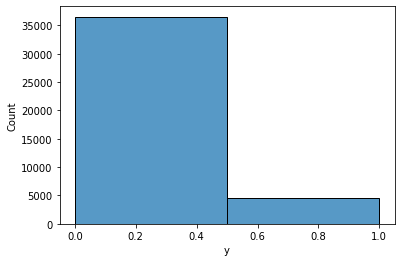

In [17]:
# plot label
sns_plot = sns.histplot(y, bins=2)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

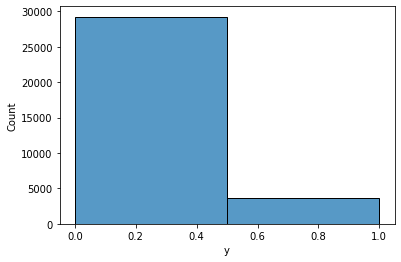

In [19]:
sns_plot = sns.histplot(y_train, bins=2)

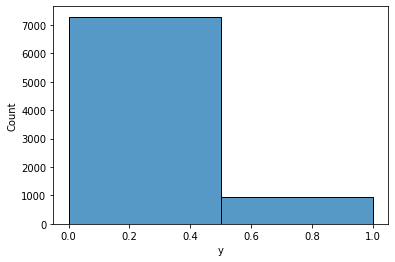

In [20]:
sns_plot = sns.histplot(y_test, bins=2)

In [ ]:
# create random forest clf
clf = RandomForestClassifier(100, max_depth=3)

In [ ]:
# train random forest clf
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# predict with random forest clf
y_pred = clf.predict(X_test)

In [ ]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[7212,   76],
       [ 794,  156]])

In [ ]:
# show the precision and recall of random forest clf
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7288
           1       0.67      0.16      0.26       950

    accuracy                           0.89      8238
   macro avg       0.79      0.58      0.60      8238
weighted avg       0.87      0.89      0.86      8238



In [32]:
# create a dummy clf
dummyClf = DummyClassifier(strategy="stratified")

In [33]:
param_grid = {
    'strategy': ["stratified"],
}

# create random forest clf
dummyClf = GridSearchCV(estimator=dummyClf, param_grid=param_grid, scoring='f1', cv=10)

In [34]:
# train dummy clf
dummyClf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DummyClassifier(constant=None, random_state=None,
                                       strategy='stratified'),
             iid='deprecated', n_jobs=None,
             param_grid={'strategy': ['stratified']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring='f1', verbose=0)

In [40]:
dummyClf.score(X_test, y_test)

0.11758360302049622

In [38]:
# predict with dummy clf
dy_pred = dummyClf.predict(X_test)

0.10688896215631583

In [36]:
# confusion matrix
confusion_matrix(y_test, dy_pred)

array([[6481,  807],
       [ 844,  106]])

In [37]:
# show the precision and recall of dummy clf
print(classification_report(y_test, dy_pred))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      7288
           1       0.12      0.11      0.11       950

    accuracy                           0.80      8238
   macro avg       0.50      0.50      0.50      8238
weighted avg       0.80      0.80      0.80      8238



In [57]:
param_grid = {
    'n_estimators': [1000],
    #'criterion': ['gini', 'entropy'],
    'max_depth': [10],
    #'n_jobs': [-1],
    'random_state': [60],
}

In [58]:
# create random forest clf
clf = RandomForestClassifier()
clf = GridSearchCV(estimator=clf, param_grid=param_grid, scoring='f1', cv=10)

In [59]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [60]:
clf.score(X_test, y_test)

0.34445306439100076

In [61]:
y_pred2 = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7288
           1       0.66      0.23      0.34       950

    accuracy                           0.90      8238
   macro avg       0.78      0.61      0.64      8238
weighted avg       0.88      0.90      0.87      8238



In [62]:
print("Best balanced accuracy", clf.best_score_, "with params:", clf.best_params_)

Best balanced accuracy 0.33816058346207134 with params: {'max_depth': 10, 'n_estimators': 1000, 'random_state': 60}


[ 8  7  2 61  4  6  5  0  3  1 60 49 59 42 52 43 50 55 44 31 38 23 36 56
 57 22 48 54 14 17  9 28 58 39 10 53 33 41 34 30 18 27 21 32 25 51 26 13
 45 15 16 47 19 37 12 40 20 11 46 24 29 35]
Feature ranking:
1. nr.employed (0.150265)
2. euribor3m (0.148022)
3. pdays (0.096934)


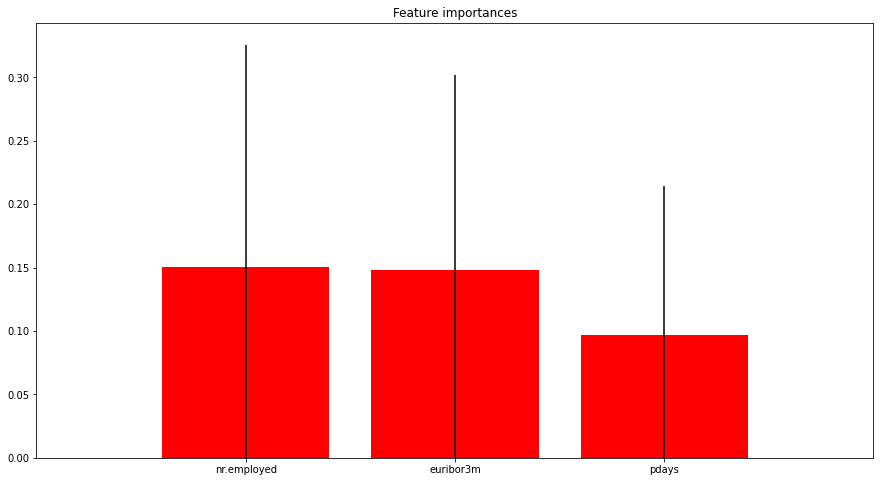

In [63]:
# TOP THREE FEATURES
importances = clf.best_estimator_.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.best_estimator_.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
indices = indices[0:3]

# Print the feature ranking
print("Feature ranking:")

feats = X.columns

#for f in range(X.shape[1]):
for f in range(0,3):
    print("%d. %s (%f)" % (f + 1, feats[indices[f]],  importances[indices[f]]))

# Plot the feature importances of the forest
fig = plt.figure()
plt.title("Feature importances")
#plt.bar(range(X.shape[1]), importances[indices],
#       color="r", yerr=std[indices], align="center")
plt.bar(range(0,3), importances[indices],
       color="r", yerr=std[indices], align="center")
#plt.xticks(range(X.shape[1]), np.array(feats)[indices])
plt.xticks(range(0,3), np.array(feats)[indices])
#plt.xlim([-1, X.shape[1]])
plt.xlim([-1, 3])
plt.ylim([0, None])

fig.set_size_inches(15, 8)

# plt.savefig("importances.pdf", bbox_inches='tight')